<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales. The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [98]:
df = pd.read_csv(sac_csv)
print df.head()
print df.tail()
print df.info()

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  
                  street             city    zip state  beds  baths  sq__ft  \
980   9169 GARLINGTON CT       SACRAMENTO  9

In [99]:
df.isnull().sum()
#no null values

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [100]:
print df.duplicated().value_counts()
df[df.duplicated(keep=False)]
#find duplicated values

False    982
True       3
dtype: int64


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
341,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
403,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [101]:
#drop duplicated values
df.drop_duplicates(inplace=True)

In [102]:
#describe statistics
df.describe(include="all")
# price and sqft has negative value

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,982,982,982.000000,982,982.000000,982.000000,982.000000,982,982,982.000000,982.000000,982.000000
unique,981,39,NaN,2,NaN,NaN,NaN,4,5,NaN,NaN,NaN
top,1223 LAMBERTON CIR,SACRAMENTO,NaN,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,438,NaN,981,NaN,NaN,NaN,914,265,NaN,NaN,NaN
mean,NaN,NaN,95750.863544,NaN,2.914460,1.779022,1314.776986,NaN,NaN,234185.358452,38.444300,-121.192904
std,NaN,NaN,85.113618,NaN,1.305838,0.894568,856.266836,NaN,NaN,138992.002773,5.111407,5.108454
min,NaN,NaN,95603.000000,NaN,0.000000,0.000000,-984.000000,NaN,NaN,-210944.000000,-121.503471,-121.551704
25%,NaN,NaN,95660.250000,NaN,2.000000,1.000000,953.000000,NaN,NaN,145000.000000,38.482337,-121.446104
50%,NaN,NaN,95762.000000,NaN,3.000000,2.000000,1304.500000,NaN,NaN,215000.000000,38.625611,-121.376009
75%,NaN,NaN,95828.000000,NaN,4.000000,2.000000,1719.500000,NaN,NaN,300000.000000,38.694512,-121.295114


In [103]:
print df['sq__ft'].sort_values().head()
print df['price'].sort_values().head()

703   -984
492      0
558      0
557      0
556      0
Name: sq__ft, dtype: int64
703   -210944
865      1551
866      2000
600      4897
581      4897
Name: price, dtype: int64


In [104]:
#remove negative values from sq__ft and price
df['sq__ft'] =  
df['price'] = df['price'].apply(lambda x: x*(-1) if x < 0 else x)

In [105]:
print df['sq__ft'].sort_values().head()
print df['price'].sort_values().head()

492    0
558    0
557    0
556    0
555    0
Name: sq__ft, dtype: int64
865    1551
866    2000
600    4897
581    4897
582    4897
Name: price, dtype: int64


In [106]:
#remove sq__ft = 0 
df = df[df['sq__ft']!=0]
len(df)
#after removing duplicates, and 0 values, dataset reduced from 985 rows to 812 rows.

812

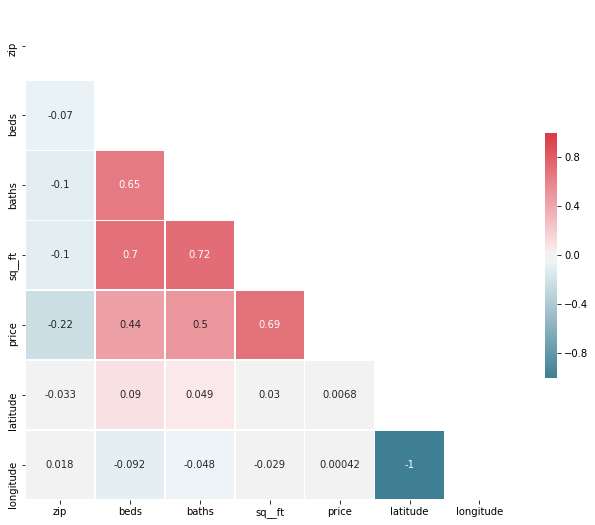

In [109]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

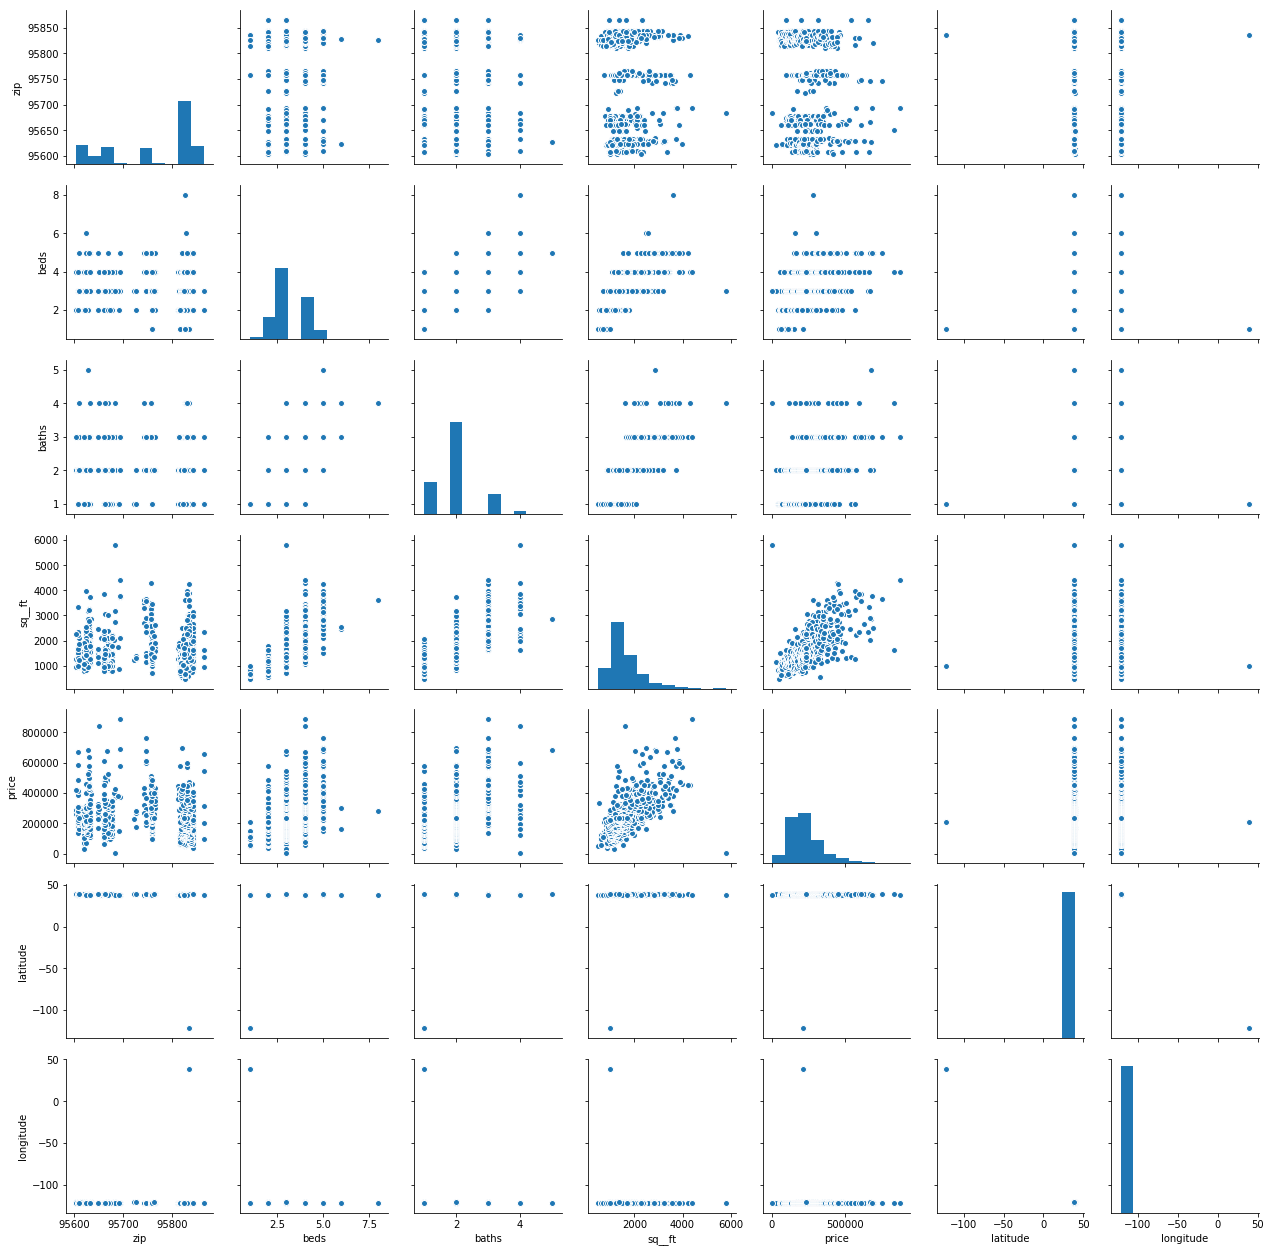

In [110]:
sns.pairplot(df)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

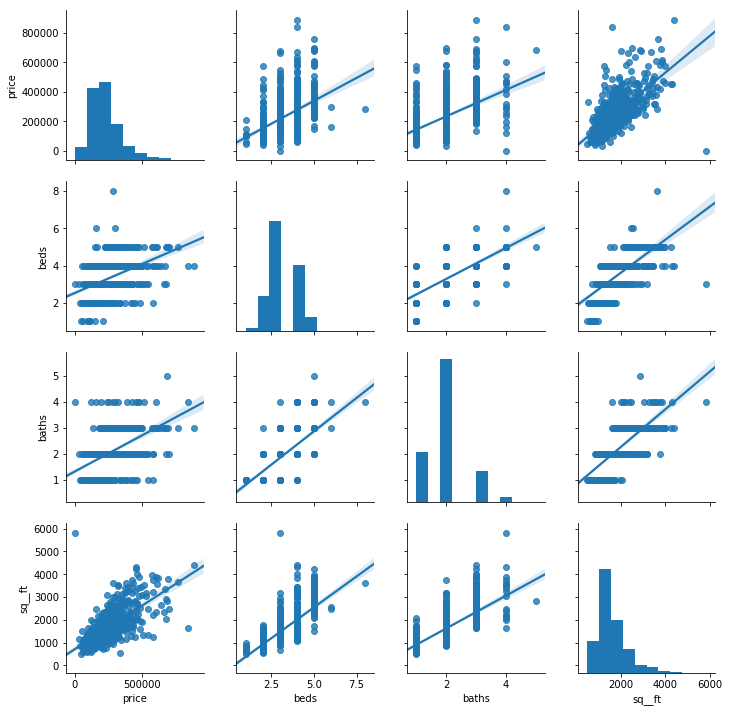

In [112]:
sns.pairplot(df[['price', 'beds', 'baths', 'sq__ft']], kind="reg")

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [ ]:
#square feet since it has the strongest correlation

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

**TIP: you can use scipy.stats.pearsonr to get the intercept**

In [124]:
y = df['price']
x = df['sq__ft']

In [135]:
corr = scipy.stats.pearsonr(x, y)[0]
y_std = y.std()
x_std = x.std()
beta1 = corr*(y_std/x_std)
beta0 = y.mean() - beta1*x.mean()

print 'correlation', round(corr,2)
print 'price stdev', round(y_std,2)
print 'area stdev', round(x_std,2)
print 'beta1', round(beta1,2)
print 'beta0', round(beta0,2)

correlation 0.69
price stdev 119819.02
area stdev 664.04
beta1 125.05
beta0 30578.62


### 6. Interpret the intercept. Interpret the slope.

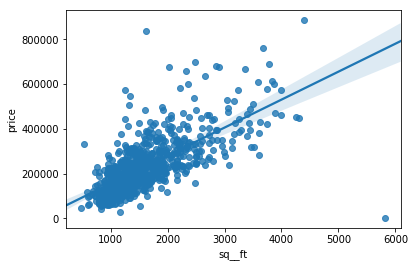

In [136]:
sns.regplot(x,y)
#slope: an increase in 1 sq ft increases price by USD 125.
#intercept: at 0 sq ft, the base price of a house is USD 30578.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [ ]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [137]:
df['Linear_Yhat'] = beta0 + beta1*df['sq__ft']

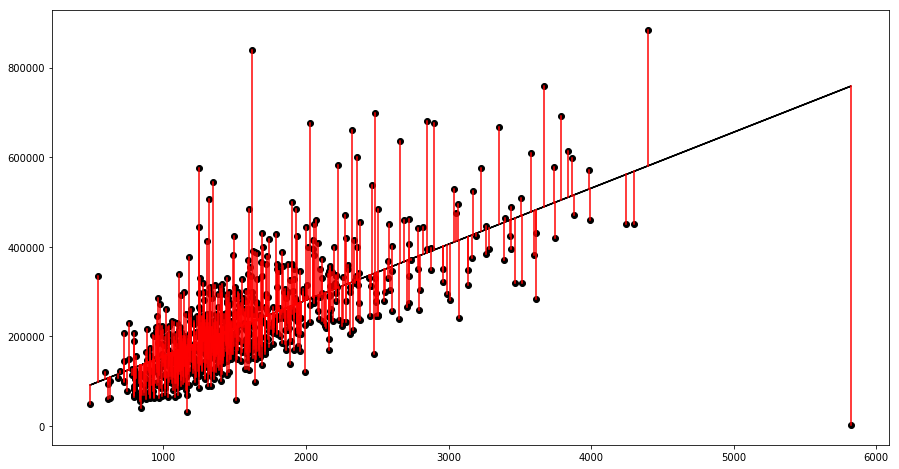

In [140]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x, y, c='k')
ax.plot(x, df['Linear_Yhat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Linear_Yhat']), 'r-')